In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv("house_price_dataset.csv")

In [4]:
df.head(10)

,ID,Location,House_Type,Bedrooms,Bathrooms,Square_Feet,Year_Built,Garage_Type,Has_Garden,Condition,Distance_to_City_Center_km,Price
0,1,Houston,Condo,5,3,3415,1985,Attached,1,Poor,7.36,615800
1,2,Phoenix,Semi-Detached,1,1,2728,1958,Attached,0,Poor,12.51,436500
2,3,Chicago,Detached,5,3,4449,2006,NaN,0,Excellent,34.12,766700
3,4,Phoenix,Condo,2,2,2696,1953,NaN,0,Excellent,46.05,443300
4,5,Phoenix,Detached,2,1,1861,2000,Attached,0,Excellent,1.93,349800
5,6,Los Angeles,Detached,5,1,3161,1988,Detached,0,Fair,32.49,574000
6,7,Chicago,Townhouse,3,1,1572,2001,Attached,0,Fair,35.53,317000
7,8,Chicago,Detached,1,2,2444,2020,Attached,1,Fair,30.28,394500
8,9,Chicago,Detached,5,3,1562,2004,NaN,1,Poor,21.95,363300
9,10,Phoenix,Condo,1,3,1729,1980,NaN,1,Fair,49.41,349600


In [5]:
 df.shape

(20000, 12)

**EDA**

In [7]:
df.isnull().sum()

ID                               0
Location                         0
House_Type                       0
Bedrooms                         0
Bathrooms                        0
Square_Feet                      0
Year_Built                       0
Garage_Type                   6692
Has_Garden                       0
Condition                        0
Distance_to_City_Center_km       0
Price                            0
dtype: int64

In [8]:
df.dtypes

ID                              int64
Location                       object
House_Type                     object
Bedrooms                        int64
Bathrooms                       int64
Square_Feet                     int64
Year_Built                      int64
Garage_Type                    object
Has_Garden                      int64
Condition                      object
Distance_to_City_Center_km    float64
Price                           int64
dtype: object

In [9]:
for x in df.columns:
    if df[x].dtype=="object":
        df[x]=df[x].astype("category")


In [10]:
df.dtypes

ID                               int64
Location                      category
House_Type                    category
Bedrooms                         int64
Bathrooms                        int64
Square_Feet                      int64
Year_Built                       int64
Garage_Type                   category
Has_Garden                       int64
Condition                     category
Distance_to_City_Center_km     float64
Price                            int64
dtype: object

In [11]:
#ID is not importent and Garage has more null values so we can drop those
df.drop(["ID","Garage_Type"],axis=1,inplace=True)

In [12]:
df.head()

,Location,House_Type,Bedrooms,Bathrooms,Square_Feet,Year_Built,Has_Garden,Condition,Distance_to_City_Center_km,Price
0,Houston,Condo,5,3,3415,1985,1,Poor,7.36,615800
1,Phoenix,Semi-Detached,1,1,2728,1958,0,Poor,12.51,436500
2,Chicago,Detached,5,3,4449,2006,0,Excellent,34.12,766700
3,Phoenix,Condo,2,2,2696,1953,0,Excellent,46.05,443300
4,Phoenix,Detached,2,1,1861,2000,0,Excellent,1.93,349800


In [13]:
df["Location"].value_counts()

Location
Los Angeles    4073
Phoenix        4042
New York       4041
Houston        3977
Chicago        3867
Name: count, dtype: int64

In [14]:
 for x in df.columns:
     if df[x].dtype=="category":
         df[x]=df[x].cat.codes

In [15]:
df.head()

,Location,House_Type,Bedrooms,Bathrooms,Square_Feet,Year_Built,Has_Garden,Condition,Distance_to_City_Center_km,Price
0,1,0,5,3,3415,1985,1,3,7.36,615800
1,4,2,1,1,2728,1958,0,3,12.51,436500
2,0,1,5,3,4449,2006,0,0,34.12,766700
3,4,0,2,2,2696,1953,0,0,46.05,443300
4,4,1,2,1,1861,2000,0,0,1.93,349800


In [16]:
cr=df.corr()

In [17]:
cr

,Location,House_Type,Bedrooms,Bathrooms,Square_Feet,Year_Built,Has_Garden,Condition,Distance_to_City_Center_km,Price
Location,1.000000,0.008400,-0.003108,-0.002754,-0.003946,-0.003854,0.001411,0.003256,-0.007125,-0.004227
House_Type,0.008400,1.000000,-0.009164,0.000847,-0.000289,-0.003693,0.000586,-0.004576,-0.007697,-0.000990
Bedrooms,-0.003108,-0.009164,1.000000,0.002445,-0.000900,-0.009749,-0.005427,0.009571,-0.001016,0.071277
Bathrooms,-0.002754,0.000847,0.002445,1.000000,0.003556,-0.003289,-0.004487,0.006784,0.006819,0.032030
Square_Feet,-0.003946,-0.000289,-0.000900,0.003556,1.000000,0.001945,0.001123,0.002807,0.003648,0.991140
Year_Built,-0.003854,-0.003693,-0.009749,-0.003289,0.001945,1.000000,-0.005749,0.011259,-0.001873,-0.000386
Has_Garden,0.001411,0.000586,-0.005427,-0.004487,0.001123,-0.005749,1.000000,0.003761,0.009583,0.000728
Condition,0.003256,-0.004576,0.009571,0.006784,0.002807,0.011259,0.003761,1.000000,-0.005448,0.004794
Distance_to_City_Center_km,-0.007125,-0.007697,-0.001016,0.006819,0.003648,-0.001873,0.009583,-0.005448,1.000000,-0.032312
Price,-0.004227,-0.000990,0.071277,0.032030,0.991140,-0.000386,0.000728,0.004794,-0.032312,1.000000


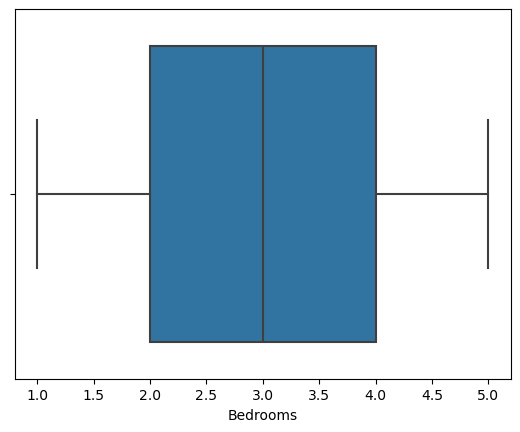

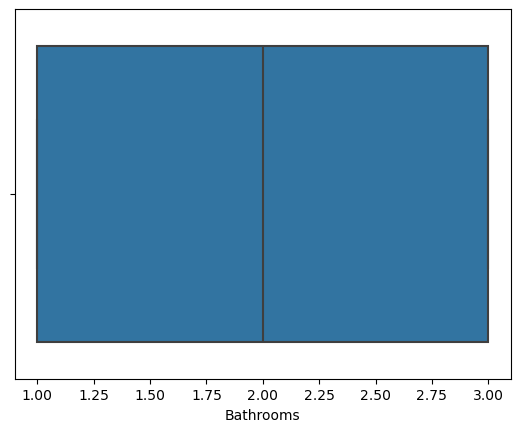

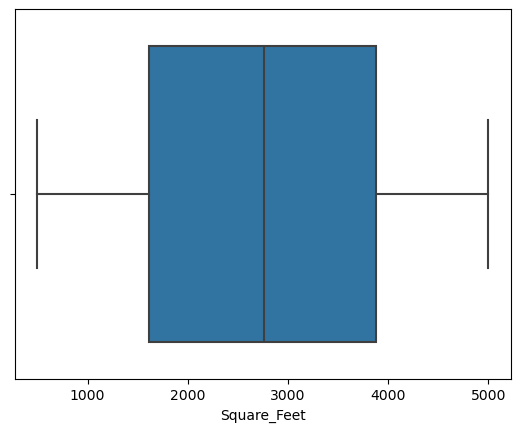

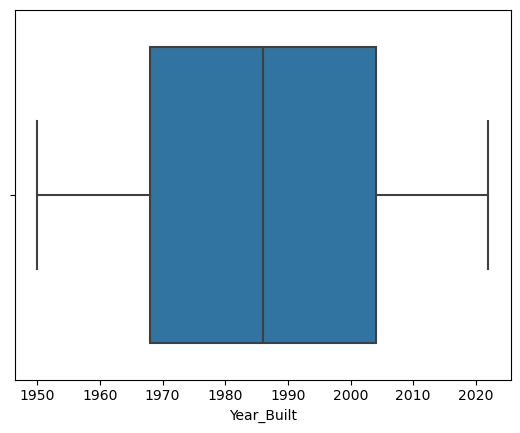

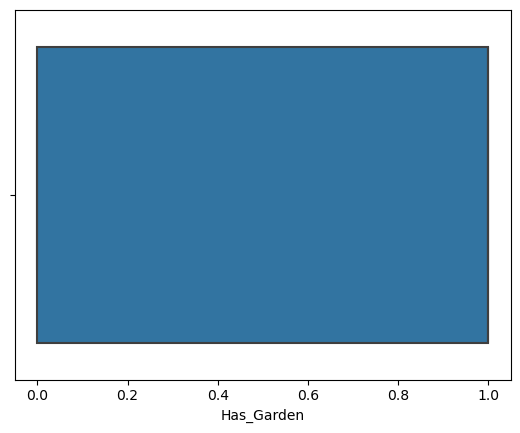

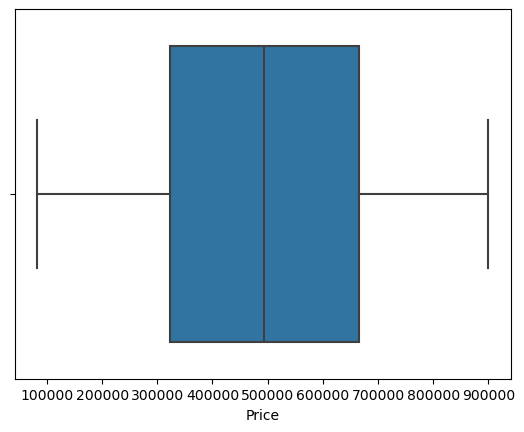

In [18]:
for x in df.columns:
    if df[x].dtype=="int64":
        sns.boxplot(data=df,x=df[x])
        plt.show()
        

**No outliers**

In [20]:
df.head()

,Location,House_Type,Bedrooms,Bathrooms,Square_Feet,Year_Built,Has_Garden,Condition,Distance_to_City_Center_km,Price
0,1,0,5,3,3415,1985,1,3,7.36,615800
1,4,2,1,1,2728,1958,0,3,12.51,436500
2,0,1,5,3,4449,2006,0,0,34.12,766700
3,4,0,2,2,2696,1953,0,0,46.05,443300
4,4,1,2,1,1861,2000,0,0,1.93,349800


<Axes: >

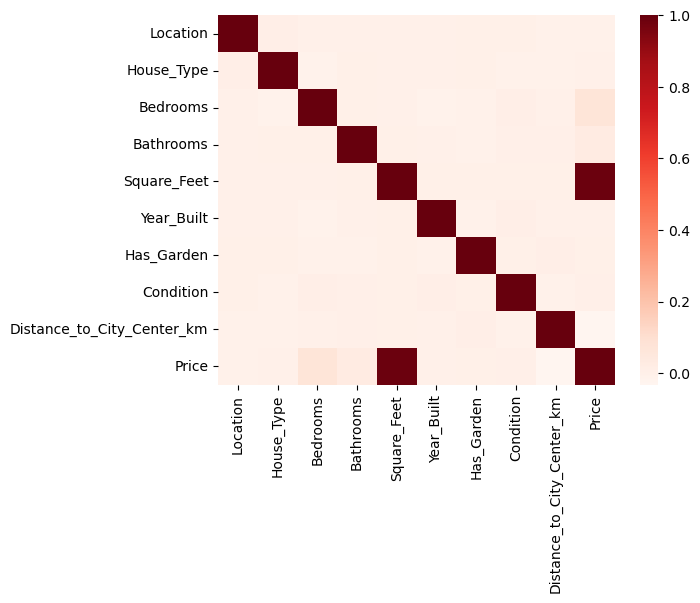

In [21]:
sns.heatmap(cr,cmap="Reds")

**We have only one highly correlated feature Square_Feet and minimal correlated column Bedrooms**

In [23]:
df.head(1)

,Location,House_Type,Bedrooms,Bathrooms,Square_Feet,Year_Built,Has_Garden,Condition,Distance_to_City_Center_km,Price
0,1,0,5,3,3415,1985,1,3,7.36,615800


Since all features are in single digits and only Square ft is in thousand's we only need to scale down the **Square_Feet** feature

In [25]:
from sklearn.preprocessing import StandardScaler,Normalizer

In [26]:
ss=StandardScaler()
nz=Normalizer()

In [27]:
ss

StandardScaler()

In [28]:
df["Square_Feet"]=ss.fit_transform(df[["Square_Feet"]])
 

In [29]:
df.sample(10)

,Location,House_Type,Bedrooms,Bathrooms,Square_Feet,Year_Built,Has_Garden,Condition,Distance_to_City_Center_km,Price
11874,4,1,4,3,1.484541,1996,0,2,6.91,814100
7442,4,1,3,3,-0.350174,2012,0,2,4.26,454500
6248,4,3,4,3,1.323466,2015,1,0,24.51,746300
14225,2,2,1,2,1.442354,2009,1,2,2.22,773900
16386,0,0,2,1,1.691636,1975,0,2,47.47,812000
17366,4,2,2,1,1.386362,1951,1,1,23.99,741000
14624,3,0,3,2,-0.312590,2000,1,1,12.40,444600
7995,2,3,2,1,-1.644905,1957,0,1,46.47,144000
15802,1,2,4,2,-1.636468,1991,1,1,26.08,195400
9978,4,2,1,1,-1.496870,1954,1,1,28.71,197100


**The data is ready for Model building**